In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive"

'1 ￼ Let Me.txt'
'23052331 - I O Assignment.gdoc'
'23052331 (String Assignment).gdoc'
 All
'BEST OF ME.txt'
'Bird Species Prediction'
 com.feralinteractive.gridautosport_edition_android
'Document from Kunal Tripathi'
 Falling
 FB_IMG_15084058151232546.jpg
 FB_IMG_15084058466271098.jpg
'Getting started.pdf'
'Google Photos'
'Memories kiit'
'The 48 Laws Of Power.pdf'
'The_Mystery_of_Edwin_Drood_by_Charles_Dickens (1).mobi'
 The_Mystery_of_Edwin_Drood_by_Charles_Dickens.mobi
'Untitled document.gdoc'
'Untitled form.gform'
'Video from Kunal Tripathi'


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.model_selection import train_test_split


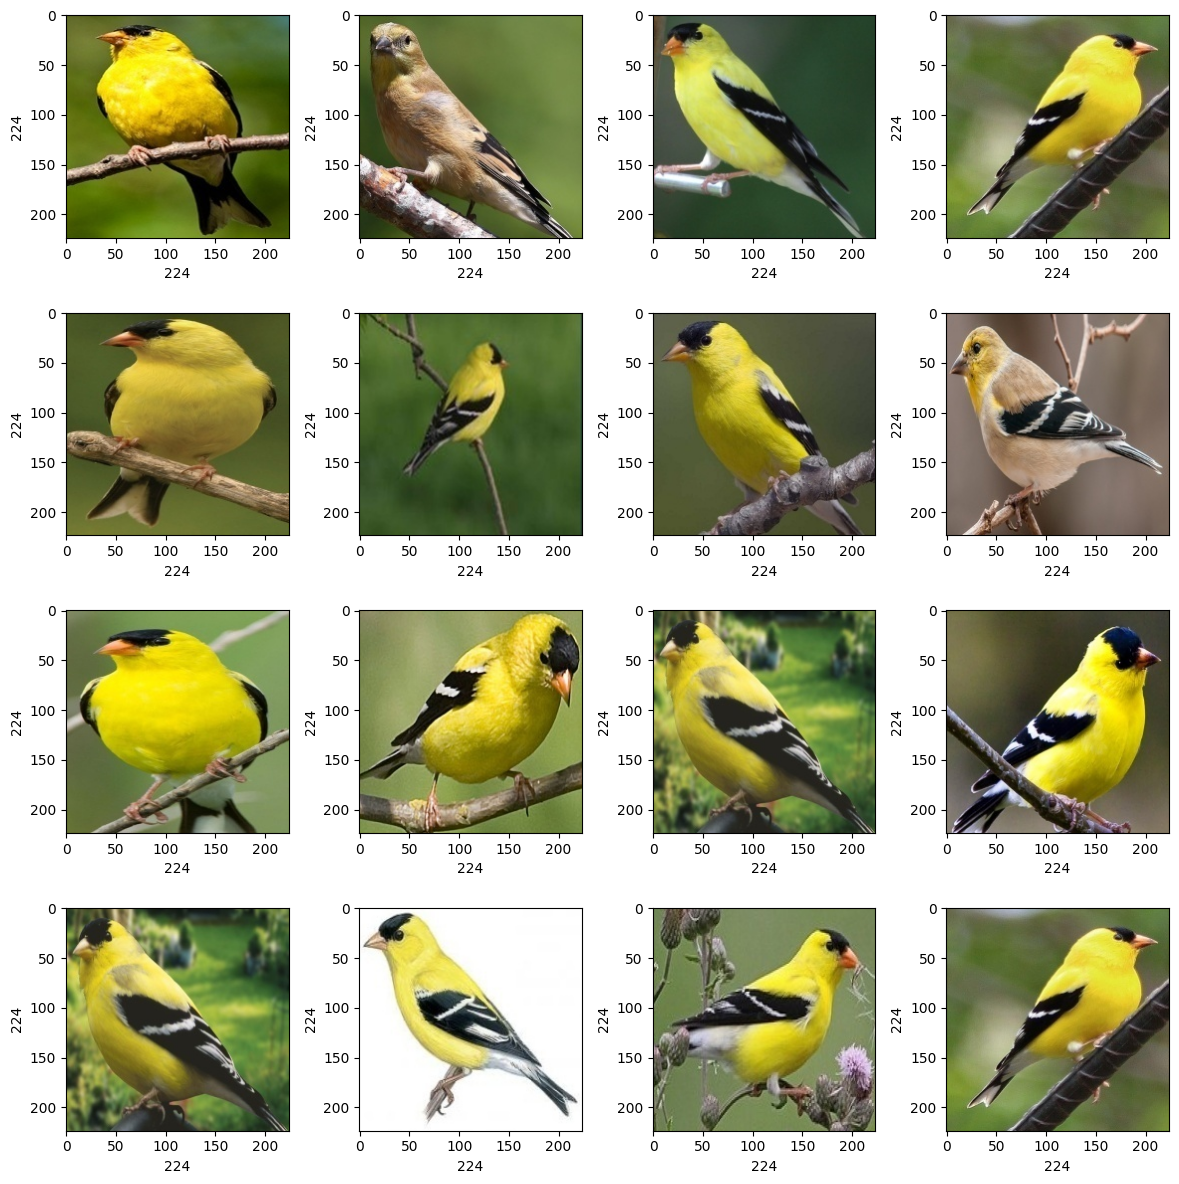

In [5]:
plt.figure(figsize=(12,12))
path="/content/drive/My Drive/Bird Species Prediction/Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+"/"+random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10)
  plt.ylabel(rand_img.shape[0],fontsize=10)


In [6]:
dir = "/content/drive/My Drive/Bird Species Prediction/Data/Bird Speciees Dataset"
root_dir= listdir(dir)
image_list,label_list=[],[]

In [7]:
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path=f"{dir}/{directory}/{files}"
    image=cv2.imread(image_path)
    image=img_to_array(image)
    image_list.append(image)
    label_list.append(directory)


In [8]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts

,count
0,
AMERICAN GOLDFINCH,143
EMPEROR PENGUIN,139
DOWNY WOODPECKER,137
FLAMINGO,132
CARMINE BEE-EATER,131
BARN OWL,129


In [9]:
num_classes=len(label_counts)
num_classes

6

In [10]:
image_list[0].shape

(224, 224, 3)

In [11]:
label_list=np.array(label_list)
label_list.shape

(811,)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [13]:
x_train=np.array(x_train,dtype=np.float16)/225.0
x_test=np.array(x_test,dtype=np.float16)/225.0
x_train=x_train.reshape(-1,224,224,3)
x_test=x_test.reshape(-1,224,224,3)


In [14]:
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [15]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [16]:
model=Sequential()
model.add(Conv2D(8,(3,3),padding="same" ,input_shape=(224,224,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,334,038 (5.09 MB)

 Trainable params: 1,334,038 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0005),metrics=['accuracy'])

In [ ]:
epochs=50
batch_size=128
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.1765 - loss: 1.7751 - val_accuracy: 0.4538 - val_loss: 1.5501
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4693 - loss: 1.5013 - val_accuracy: 0.6769 - val_loss: 1.2619
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6308 - loss: 1.2695 - val_accuracy: 0.6769 - val_loss: 1.1088
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.6722 - loss: 1.0433 - val_accuracy: 0.7000 - val_loss: 0.9392
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7378 - loss: 0.8676 - val_accuracy: 0.7308 - val_loss: 0.8141
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7414 - loss: 0.7692 - val_accuracy: 0.7000 - val_loss: 0.7786
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7167 - loss: 0.7348 - val_accuracy: 0.7538 - val_loss: 0.7192
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7944 - loss: 0.6322 - val_accuracy: 0.8000 - val_loss: 0.6442
Epoch 9/

In [ ]:
model.save("/content/drive/My Drive/Bird Species Prediction/bird_species.h5")

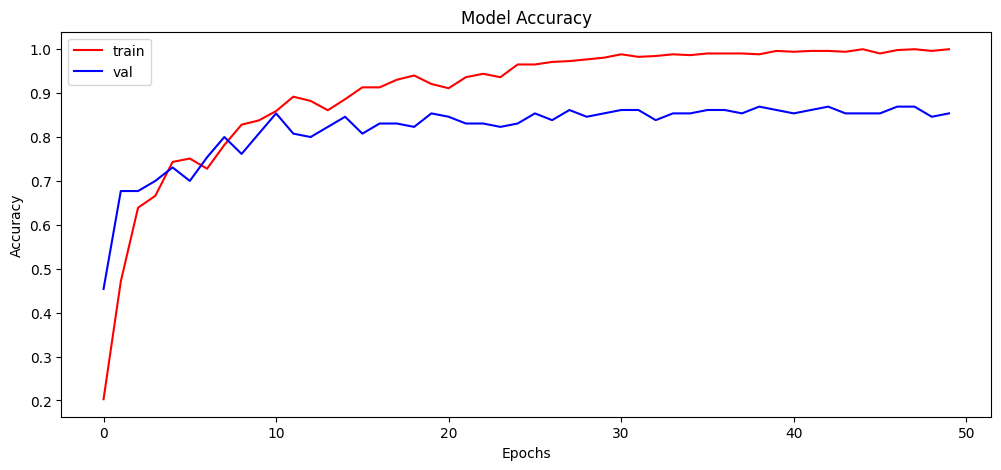

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

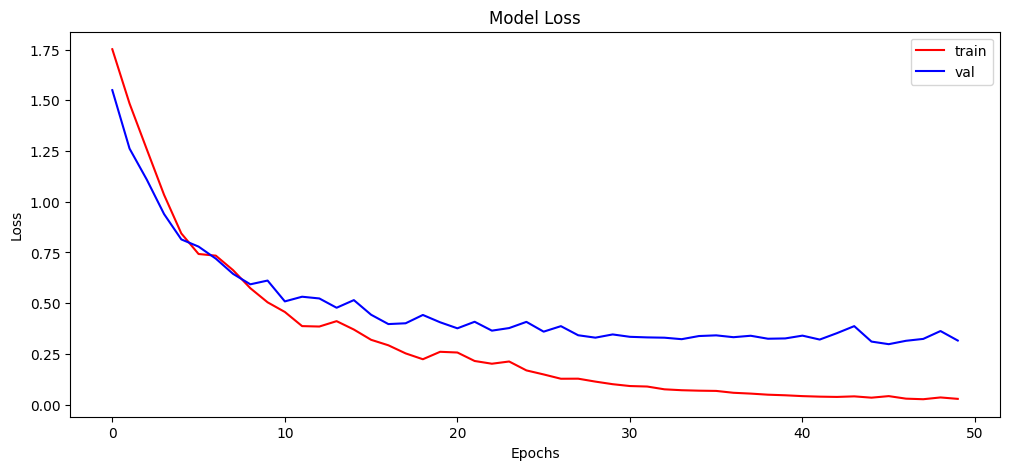

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [ ]:
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.8285 - loss: 0.3894
Test Accuracy: 83.43558311462402


In [ ]:
y_pred=model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step


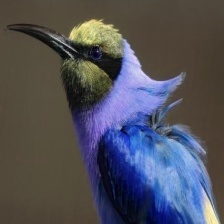

In [ ]:
img=array_to_img(x_test[5])
img

In [ ]:
labels=lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  CARMINE BEE-EATER
Predicted :  FLAMINGO
